# Chicago Divvy Bicycle Sharing Data

For this project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/datasets/yingwurenjian/chicago-divvy-bicycle-sharing-data/code). The data contains the following fields:

* trip_idID attached to each trip taken
* year
* month
* week week No.
* day: where 0 is Monday and 6 is Sunday
* hour
* usertype: "Customer" is a rider who purchased a 24-Hour Pass; "Subscriber" is a rider who purchased an Annual Membership
* gender
* starttime: day and time trip started, in CST
* stoptime: day and time trip ended, in CST
* tripduration: time of trip in minutes
* temperature
* events
* from_station_id: ID of station where trip originated
* from_station_name: name of station where trip terminated
* latitude_startstation: latitude
* longitude_startstation: longitude
* dpcapacity_start: number of total docks at each station
* to_station_id
* to_station_name
* latitude_end
* longitude_end
* dpcapacity_end: number of total docks at each station

# Data And Setup

____
### Import numpy and pandas

In [462]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
### Set Option to None To Show All Columns
pd.set_option('display.max_columns', None)

### Import visualization libraries and set %matplotlib inline. 

In [463]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import plotly.graph_objects as go

### Download Dataset through Kaggle API

In [464]:
#!kaggle datasets download -d yingwurenjian/chicago-divvy-bicycle-sharing-data

In [465]:
# import zipfile
# with zipfile.ZipFile("chicago-divvy-bicycle-sharing-data.zip") as zipref:
#     zipref.extractall() 

### Read in the csv file as a dataframe called df

In [466]:
df = pd.read_csv('./data.csv')
# df = pd.read_csv('/kaggle/input/chicago-divvy-bicycle-sharing-data/data.csv')

In [467]:
df.head(2)

,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,tripduration,temperature,events,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end
0,2355134,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:57:00,2014-07-01 00:07:00,10.066667,68.0,tstorms,131,Lincoln Ave & Belmont Ave,41.939365,-87.668385,15.0,303,Broadway & Cornelia Ave,41.945512,-87.645980,15.0
1,2355133,2014,6,27,0,23,Subscriber,Male,2014-06-30 23:56:00,2014-07-01 00:00:00,4.383333,68.0,tstorms,282,Halsted St & Maxwell St,41.864580,-87.646930,15.0,22,May St & Taylor St,41.869482,-87.655486,15.0


** Check the info() of the df **

In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9495235 entries, 0 to 9495234
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   trip_id            int64  
 1   year               int64  
 2   month              int64  
 3   week               int64  
 4   day                int64  
 5   hour               int64  
 6   usertype           object 
 7   gender             object 
 8   starttime          object 
 9   stoptime           object 
 10  tripduration       float64
 11  temperature        float64
 12  events             object 
 13  from_station_id    int64  
 14  from_station_name  object 
 15  latitude_start     float64
 16  longitude_start    float64
 17  dpcapacity_start   float64
 18  to_station_id      int64  
 19  to_station_name    object 
 20  latitude_end       float64
 21  longitude_end      float64
 22  dpcapacity_end     float64
dtypes: float64(8), int64(8), object(7)
memory usage: 1.6+ GB


# Missing Values

In [469]:
# Find Missing Values
df.loc[:, df.isnull().any()].columns

Index([], dtype='object')

In [470]:
df.isna().sum()

trip_id              0
year                 0
month                0
week                 0
day                  0
hour                 0
usertype             0
gender               0
starttime            0
stoptime             0
tripduration         0
temperature          0
events               0
from_station_id      0
from_station_name    0
latitude_start       0
longitude_start      0
dpcapacity_start     0
to_station_id        0
to_station_name      0
latitude_end         0
longitude_end        0
dpcapacity_end       0
dtype: int64

# Data preprocessing and Inspecting Data

#### Chigaco holidays, federal and locals from 2014 to 2017

- New Year’s Day January 1, Christmas Day December 25, Veteran’s Day November 11, Independence Day July 4, Martin Luther King Jr Day Third Monday in January, 
- President’s Day Third Monday in February, Pulaski Day First Monday in March (observed mostly by city offices), Memorial Day Last Monday in May, 
- Labor Day First Monday in September, Columbus Day Second Monday in October and Thanksgiving Day Fourth Thursday in November

In [471]:
holidays = [
'2014-01-01','2014-12-25', '2014-11-11','2014-07-04', '2014-01-20','2014-02-17', '2014-03-02','2014-05-26',
'2014-09-01','2014-10-13', '2014-11-27','2015-01-01', '2015-12-25','2015-11-11', '2015-07-04','2015-01-19', 
'2015-02-16','2015-03-02', '2015-05-25','2015-09-07', '2015-10-12','2015-11-26', '2016-01-01','2016-12-25', 
'2016-11-11','2016-07-04', '2016-01-18','2016-02-15', '2016-03-04','2016-05-30', '2016-09-05','2016-10-10', 
'2016-11-24','2017-01-01', '2017-12-25','2017-11-11', '2017-07-04','2017-01-16', '2017-02-20','2017-03-06',
'2017-05-29','2017-09-04', '2017-10-09','2017-11-23' 
]

df_holidays = pd.DataFrame(holidays)

# Rename Column
df_holidays.columns = ['date']

# Convert string to date
df_holidays['date'] = pd.to_datetime(df_holidays['date'])
df_holidays['date'] = df_holidays['date'].dt.date

# Adding 'holiday' column
df_holidays['holiday'] = int(1)

In [472]:
#df_holidays

# Adding New Features

In [473]:
# Adding 'date' column
df.starttime = pd.to_datetime(df.starttime)
df.stoptime  = pd.to_datetime(df.stoptime)
df['date']   = df.starttime.dt.date

# Adding 'weekend' column
df['weekend'] = np.where(df.starttime.dt.weekday > 4 , 1, 0)

# Adding 'dayofweek' column
df['dayofweek'] = df['starttime'].dt.day_name().str[:3]

monthMap = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
            7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

df['months'] = df['month'].map(monthMap)

# Adding 'dayofmonth' column
df['dayofmonth'] = df['starttime'].dt.day

# Adding 'dayofyear' column
df['dayofyear'] = df['starttime'].dt.dayofyear

#Trip count
df['trip_count'] = 1

Adding Seasons

Typically in Northern Hemisphere Season Starts: 
- Spring: March 21 - June 20
- Summer: June 21 - September 20
- Fall: September 21 - December 20
- Winter: December 21 - March 20

In [474]:
df['season'] = ''

for x in range(df.year.min() - 1, df.year.max() + 1):
    # Spring: March 21 - June 20
    df.loc[(df.starttime >= str(x) +'-03-21 00:00:00') & (df.starttime <= str(x) +'-06-20 23:59:59'),  'season'] = 'spring'
    # Summer: June 21 - September 20
    df.loc[(df.starttime >= str(x) +'-06-21 00:00:00') & (df.starttime <= str(x) +'-09-20 23:59:59'),  'season'] = 'summer'
    # Fall: September 21 - December 20
    df.loc[(df.starttime >= str(x) +'-09-21 00:00:00') & (df.starttime <= str(x) +'-12-20 23:59:59'),  'season'] = 'fall'
    # Winter: December 21 - March 20
    df.loc[(df.starttime >= str(x) +'-12-21 00:00:00') & (df.starttime <= str(x + 1) +'-03-20 23:59:59'),'season'] = 'winter'

In [475]:
#df[df['season']=='winter']

# Join

In [476]:
df = df.set_index('date').join(df_holidays.set_index('date'))

In [477]:
df['isholiday']  = np.where(df.holiday == 1, 1, 0)
df['regularday'] = np.where(df.isholiday + df.weekend == 0, 1, 0)

# Columns Rearrange

In [478]:
df.columns

Index(['trip_id', 'year', 'month', 'week', 'day', 'hour', 'usertype', 'gender',
       'starttime', 'stoptime', 'tripduration', 'temperature', 'events',
       'from_station_id', 'from_station_name', 'latitude_start',
       'longitude_start', 'dpcapacity_start', 'to_station_id',
       'to_station_name', 'latitude_end', 'longitude_end', 'dpcapacity_end',
       'weekend', 'dayofweek', 'months', 'dayofmonth', 'dayofyear',
       'trip_count', 'season', 'holiday', 'isholiday', 'regularday'],
      dtype='object')

In [479]:
newCols = ['trip_id', 'trip_count', 'year', 'month', 'months', 'week', 'day', 'hour', 'weekend', 'dayofweek', 'dayofmonth', 'dayofyear', 
           'season', 'holiday', 'isholiday', 'regularday', 'usertype', 'gender', 'starttime', 'stoptime', 'tripduration', 
           'temperature', 'events', 'from_station_id', 'from_station_name', 'latitude_start', 'longitude_start', 
           'dpcapacity_start', 'to_station_id', 'to_station_name', 'latitude_end', 'longitude_end', 'dpcapacity_end']

In [480]:
df = df[newCols]

# Drop Columns

In [481]:
#df.drop(['trip_id', 'holiday'], axis = 1, inplace = True)
df.drop(['holiday', 'month', 'day'], axis = 1, inplace = True)

In [482]:
df.head(1)

,trip_id,trip_count,year,months,week,hour,weekend,dayofweek,dayofmonth,dayofyear,season,isholiday,regularday,usertype,gender,starttime,stoptime,tripduration,temperature,events,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-01,1109972,1,2014,Jan,1,23,0,Wed,1,1,winter,1,0,Subscriber,Male,2014-01-01 23:13:00,2014-01-01 23:18:00,4.883333,21.0,rain or snow,304,Halsted St & Waveland Ave,41.949375,-87.649626,15.0,312,Clarendon Ave & Gordon Ter,41.957879,-87.649519,15.0


# Explanatory Data Analysis

____

# 1 - What are the TOP 10 popular stations to begin a ride at?

In [483]:
df_StartStation_Count = pd.DataFrame(df['from_station_name'].value_counts().reset_index(name = 'Counts'))
df_StartStation_Count.columns = ['from_station_name', 'Counts']
df_top10 = df_StartStation_Count.head(10)
df_top10

,from_station_name,Counts
0,Clinton St & Washington Blvd,164669
1,Canal St & Adams St,140197
2,Clinton St & Madison St,122229
3,Canal St & Madison St,121728
4,Columbus Dr & Randolph St,87577
5,Daley Center Plaza,80139
6,Kingsbury St & Kinzie St,79267
7,LaSalle St & Jackson Blvd,77547
8,Dearborn St & Monroe St,75224
9,Clinton St & Lake St,72823


In [484]:
df['from_station_name'].value_counts().head(10).index

Index(['Clinton St & Washington Blvd', 'Canal St & Adams St',
       'Clinton St & Madison St', 'Canal St & Madison St',
       'Columbus Dr & Randolph St', 'Daley Center Plaza',
       'Kingsbury St & Kinzie St', 'LaSalle St & Jackson Blvd',
       'Dearborn St & Monroe St', 'Clinton St & Lake St'],
      dtype='object')

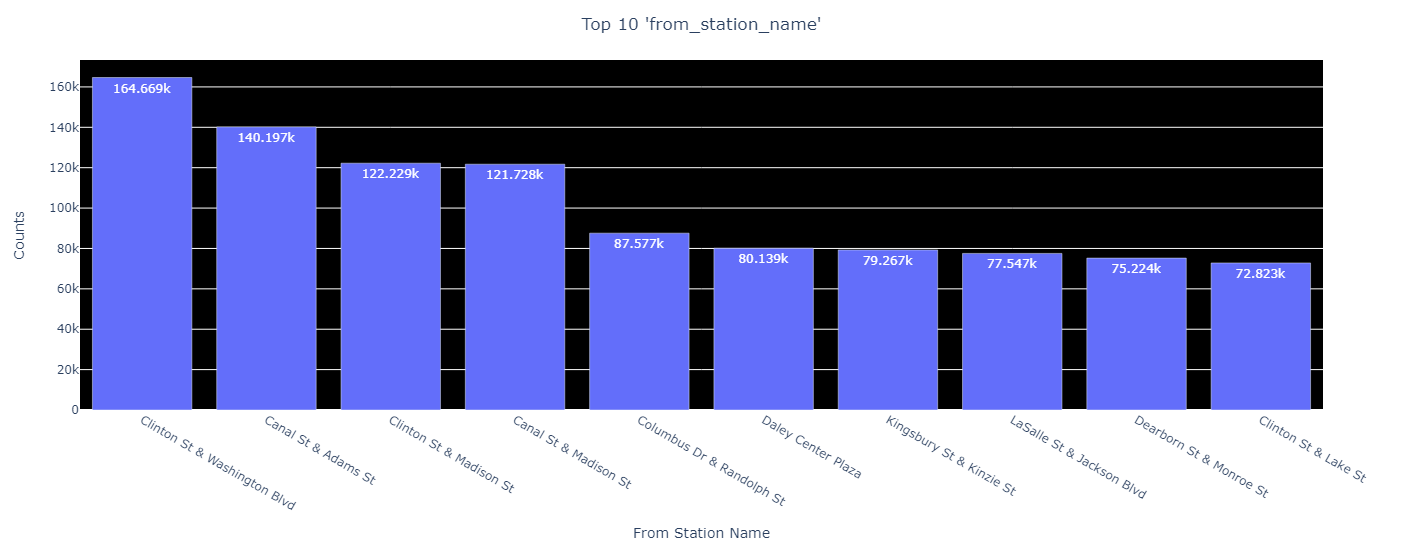

In [485]:
fig = (
    px.bar(
        df_top10,
        x = 'from_station_name',
        y = 'Counts',
        text_auto = True,
        labels = {"from_station_name": "From Station Name",},
        width = 1000,
        height = 550
    )
)

fig.update_traces(hoverinfo = "all")

fig.update_layout(
        # update layout with titles
        title = {
            "text": "Top 10 'from_station_name'",
            "x": 0.5,
        },
        yaxis_title = "Counts",
        plot_bgcolor = 'black',
        
)

fig.update_xaxes(categoryorder = "total descending")

# display the figure
fig.show()

# 2 - Average Rides

In [486]:
round(df['from_station_name'].value_counts().reset_index(name = 'Counts').mean()[0], 2)

14474.44

In [487]:
round(df['from_station_name'].value_counts().reset_index(name = 'Counts').median()[0], 2)

7086.5

# 3 - Per year Top 3 popular stations to begin a ride at?

In [488]:
dfyr = pd.crosstab(df.from_station_name, df.year)
dfyr = dfyr.reset_index()

dfyr.sort_values(by = dfyr.columns[1:].to_list(), ascending = False, inplace = True)
dfyr.reset_index(inplace = True)

In [489]:
dfyr = dfyr.iloc[0:3]
#dfyr

In [490]:
dfyr.columns

Index(['index', 'from_station_name', 2014, 2015, 2016, 2017], dtype='object', name='year')

In [491]:
dfyr.columns.to_list()[0]

'index'

In [492]:
dfyr.drop(columns = [dfyr.columns.to_list()[0]], axis = 1, inplace = True)

In [493]:
dfyr

year,from_station_name,2014,2015,2016,2017
0,Clinton St & Washington Blvd,34657,36818,45391,47803
1,Canal St & Madison St,26879,29416,33620,31813
2,Canal St & Adams St,26674,33609,31365,48549


In [494]:
dfyr.columns[1:5].to_list()

[2014, 2015, 2016, 2017]

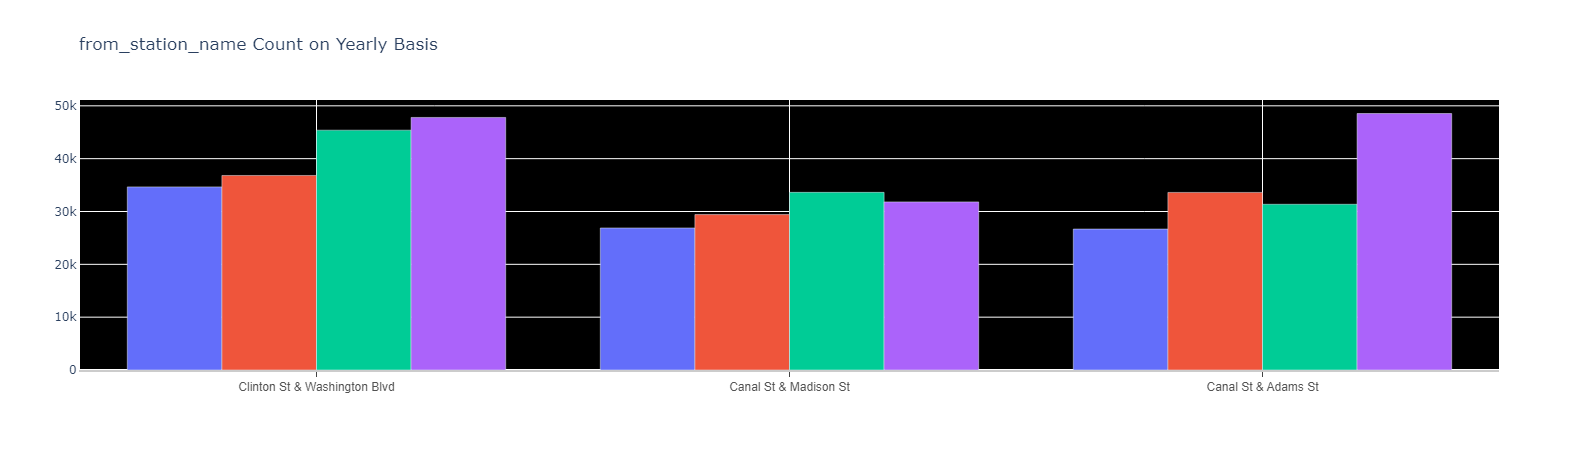

In [495]:
fig = go.Figure()

for i in dfyr.columns[1:5].to_list():

    fig.add_trace(go.Bar(x = dfyr.from_station_name, 
                            y = dfyr[i],
                            name = str(i),
                            hoverinfo = 'all',
                            #marker_color = np.random.randn(500),
                            #marker_color = 'sandybrown',
                    ))
fig.update_layout(
    xaxis = dict(
        showline = True,
        showgrid = True,
        showticklabels = True,
        linecolor = 'rgb(204, 204, 204)',
        linewidth = 2,
        ticks = 'outside',
            tickfont = dict(
                family = 'Arial',
                size = 12,
                color = 'rgb(82, 82, 82)',
                ),
    ),
    
    yaxis = dict(
        showgrid = True,
        zeroline = True,
        showline = True,
        showticklabels = True,
    ),
    
    width = 900, 
    height = 450,
    #autosize = True,
    # margin = dict(
    #     autoexpand = True,
    #     l = 100,
    #     r = 20,
    #     t = 110,
    # ),
    showlegend = False,
    plot_bgcolor = 'black',
    title = 'from_station_name Count on Yearly Basis',
)

fig.show()


In [496]:
#dfyr.plot.bar()

# 4 - Count and calculate the percentage of round trips: meaning rides from_station_name and to_station_name must be the same

In [497]:
dfSameStation = pd.DataFrame(df[df['from_station_name'] == df['to_station_name']][['from_station_name', 'to_station_name']])

In [498]:
print(f"Total Round Trips: {round(len(dfSameStation), 2)}")

Total Round Trips: 120001


In [499]:
print(f"Percentage of Round Trips: {round((len(dfSameStation) / len(df) * 100), 2)}%")

Percentage of Round Trips: 1.26%


# 5 - Popular Bike Routes

In [500]:
dfPopularRoutes = df[["from_station_name", "to_station_name"]]
dfPopularRoutes['popular_routes'] = df['from_station_name'] + ' TO ' + df['to_station_name']
dfPopularRoutes = pd.DataFrame(dfPopularRoutes['popular_routes'].value_counts().reset_index(name = 'Counts'))
dfPopularRoutes.sort_values(by = 'Counts', ascending  = False, inplace = True)
dfPopularRoutes = dfPopularRoutes.head(10)
#dfPopularRoutes

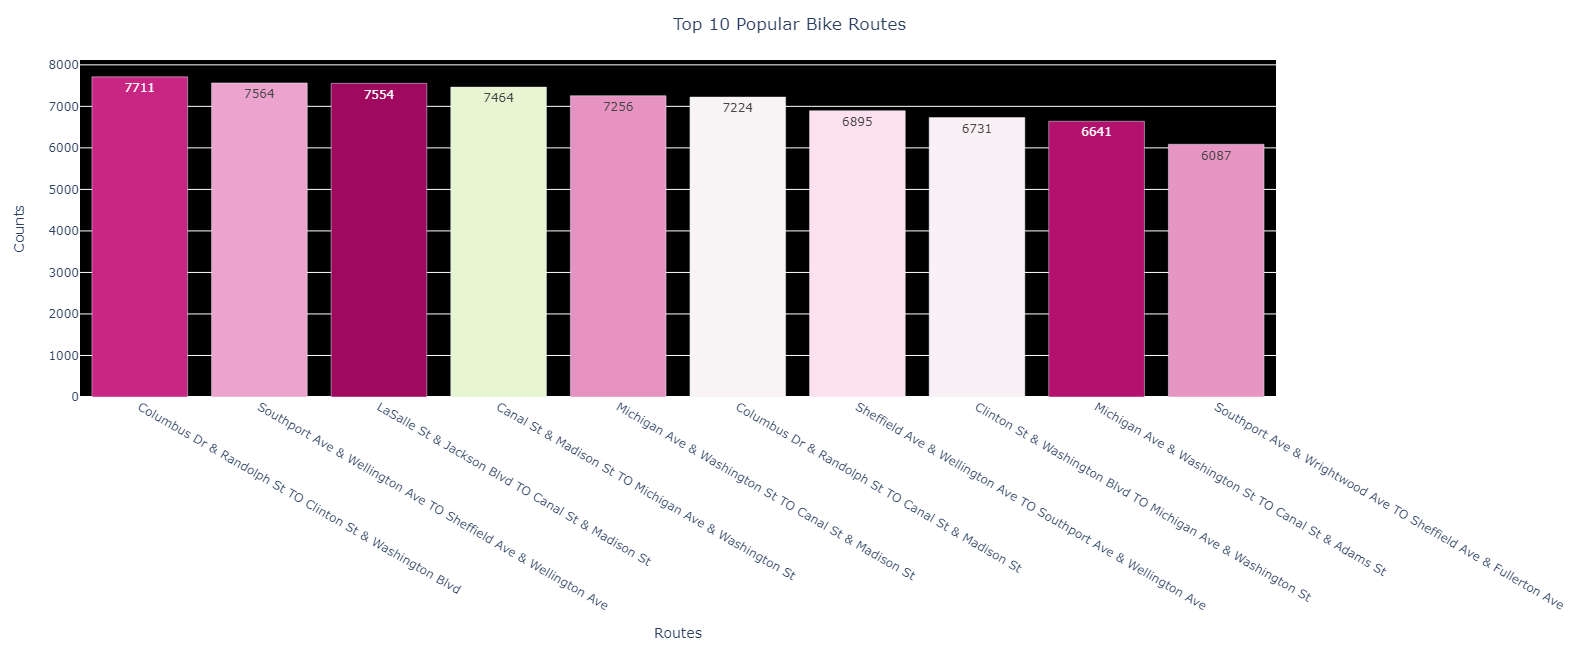

In [501]:
fig = (
    px.bar(
        dfPopularRoutes,
        x = dfPopularRoutes.columns[0],
        y = 'Counts',
        text_auto = True,
        labels = {"index": "Routes",},
        width = 1200,
        height = 650
    )
)

fig.update_traces(hoverinfo = "all", marker_color = np.random.randn(100))

fig.update_layout(
        # update layout with titles
        title = {
            "text": "Top 10 Popular Bike Routes",
            "x": 0.5,
                },
        yaxis_title = "Counts",
        plot_bgcolor = 'black',
        #showlegend = True,
)

fig.update_xaxes(categoryorder = 'total descending', color = '#444')

# display the figure
fig.show()

# 6 - Sunburst 

In [502]:
df_compareTrip = df.groupby(['gender','season','months','dayofweek'], as_index=False).agg({'tripduration': 'mean'})
#df_compareTrip

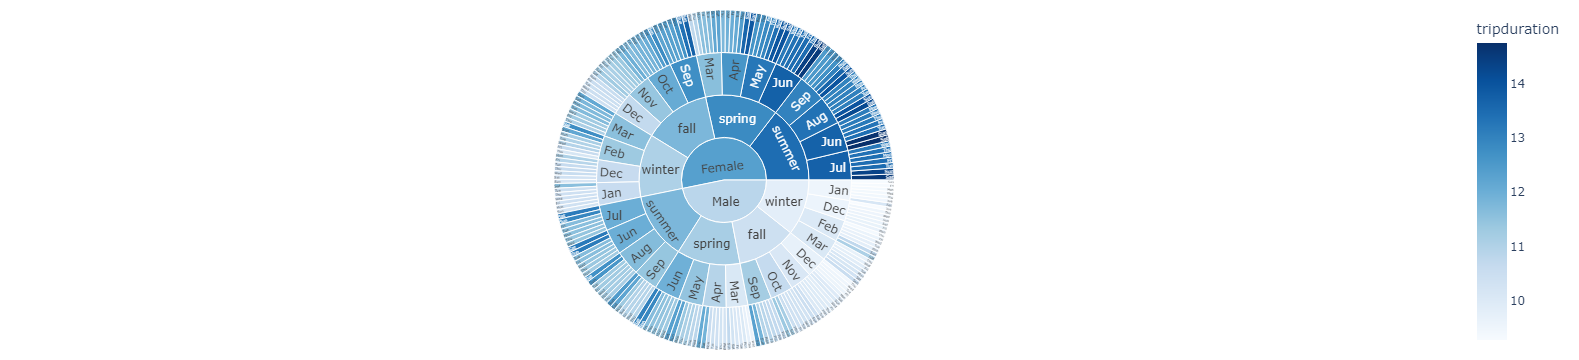

In [503]:
fig_tripduration = px.sunburst(df_compareTrip, path = ['gender', 'season', 'months', 'dayofweek'], 
                        values = 'tripduration',
                        color = 'tripduration',
                        color_continuous_scale = 'blues',
                        maxdepth = -1)

fig_tripduration.update_layout(margin = dict(t = 10, b = 10, r = 10, l = 10),
                                showlegend = False,
                                plot_bgcolor = 'black',
                                )
                  
fig_tripduration.show()

# 7 - Facetting (Day Type: Holiday, Weekend, Regularday)

### Preparing Data for Facetting

In [504]:
df1 = df.copy()

In [505]:
df1 = df[['hour', 'gender', 'months', 'dayofweek', 'events', 'usertype', 'weekend', 'isholiday', 'regularday', 'season', 'tripduration', 'trip_count']]

In [506]:
#df1.head(1)

In [507]:
## Filling some columns with catogorical values

In [508]:
#-------Day Types-------------#
#df1[(df1['weekend'] == 1) & (df1['isholiday'] == 1)][['weekend', 'isholiday', 'regularday']] #both weekend and holiday
#df1[(df1['regularday'] == 1)][['weekend', 'isholiday', 'regularday']] #regularday 
#df1[(df1['isholiday'] == 1) & (df1['weekend'] == 0)][['weekend', 'isholiday', 'regularday']] #holiday
#df1[(df1['weekend'] == 1) & (df1['isholiday'] == 0)][['weekend', 'isholiday', 'regularday']] #weekend

In [509]:
#-------Seasons Type----------#
# df1[(df1['season'] == 'fall')][['season']] # fall
# df1[(df1['season'] == 'winter')][['season']] # winter
# df1[(df1['season'] == 'spring')][['season']] # spring
# df1[(df1['season'] == 'summer')][['season']] # summer

In [510]:
df1['Day Type'] = ''
for x in range(df1.hour.min() - 1, df1.hour.max() + 1):
    # When both 'weekend' and 'isholiday' == 1
    df1.loc[(df1['weekend'] == 1) & (df1['isholiday'] == 1),  'Day Type'] = 'Both Weekend and Holiday'
    # When 'regularday' == 1
    df1.loc[(df1['regularday'] == 1),  'Day Type'] = 'Regularday'
    # When 'isholiday' == 1 and 'weekend' == 0 
    df1.loc[(df1['isholiday'] == 1) & (df1['weekend'] == 0),  'Day Type'] = 'Holiday'
    # When 'weekend' == 1 and 'isholiday' == 0
    df1.loc[(df1['weekend'] == 1) & (df1['isholiday'] == 0),'Day Type'] = 'Weekend'
    

df1['Season Type'] = ''
for x in range(df1.hour.min() - 1, df1.hour.max() + 1):
    # When 'season' == 'fall'
    df1.loc[(df1['season'] == 'fall'), 'Season Type'] = 'Fall'
    # When 'season' == 'winter'
    df1.loc[(df1['season'] == 'winter'), 'Season Type'] = 'Winter'
    # When 'season' == 'spring'
    df1.loc[(df1['season'] == 'spring'), 'Season Type'] = 'Spring'
    # When 'season' == 'summer'
    df1.loc[(df1['season'] == 'summer'), 'Season Type'] = 'Summer'

In [511]:
df1.columns

Index(['hour', 'gender', 'months', 'dayofweek', 'events', 'usertype',
       'weekend', 'isholiday', 'regularday', 'season', 'tripduration',
       'trip_count', 'Day Type', 'Season Type'],
      dtype='object')

In [512]:
df1.drop(['weekend', 'isholiday', 'regularday', 'season',], axis = 1, inplace = True)

In [513]:
df1.columns

Index(['hour', 'gender', 'months', 'dayofweek', 'events', 'usertype',
       'tripduration', 'trip_count', 'Day Type', 'Season Type'],
      dtype='object')

In [514]:
#df1

In [515]:
featureColumns = ['hour', 'gender', 'months', 'dayofweek', 'events', 'usertype', 'Day Type', 'Season Type']

In [516]:
df1 = df1.groupby(featureColumns).aggregate({'tripduration': 'mean',
                                            'trip_count': 'sum',
                                            }).reset_index()

In [517]:
df1.columns

Index(['hour', 'gender', 'months', 'dayofweek', 'events', 'usertype',
       'Day Type', 'Season Type', 'tripduration', 'trip_count'],
      dtype='object')

In [518]:
df1.columns = ['Hour', 'Gender', 'Month', 'Day of Week', 'Weather Type', 'User Type',
               'Day Type', 'Season Type', 'Avg. Trip Duration', 'Trip Count']

In [519]:
df1['Avg. Trip Duration'] = df1['Avg. Trip Duration'].apply(lambda x: round(x, 2))

In [520]:
#df1

In [521]:
df2 = df1.groupby(['Hour', 'Gender', 'Day Type']).aggregate({'Avg. Trip Duration': 'mean',
                                            'Trip Count': 'mean',
                                            }).reset_index()

In [522]:
# Changing Columns Names and Rounding off some columns

In [523]:
df2.columns = ['Hour', 'Gender', 'Day Type', 'Avg. Trip Duration', 'Avg. Trip Count']

In [524]:
df2.columns

Index(['Hour', 'Gender', 'Day Type', 'Avg. Trip Duration', 'Avg. Trip Count'], dtype='object')

In [525]:
df2['Avg. Trip Duration'] = df2['Avg. Trip Duration'].apply(lambda x: round(x, 2))
df2['Avg. Trip Count'] = df2['Avg. Trip Count'].apply(lambda x: round(x, 2))

In [526]:
#df2

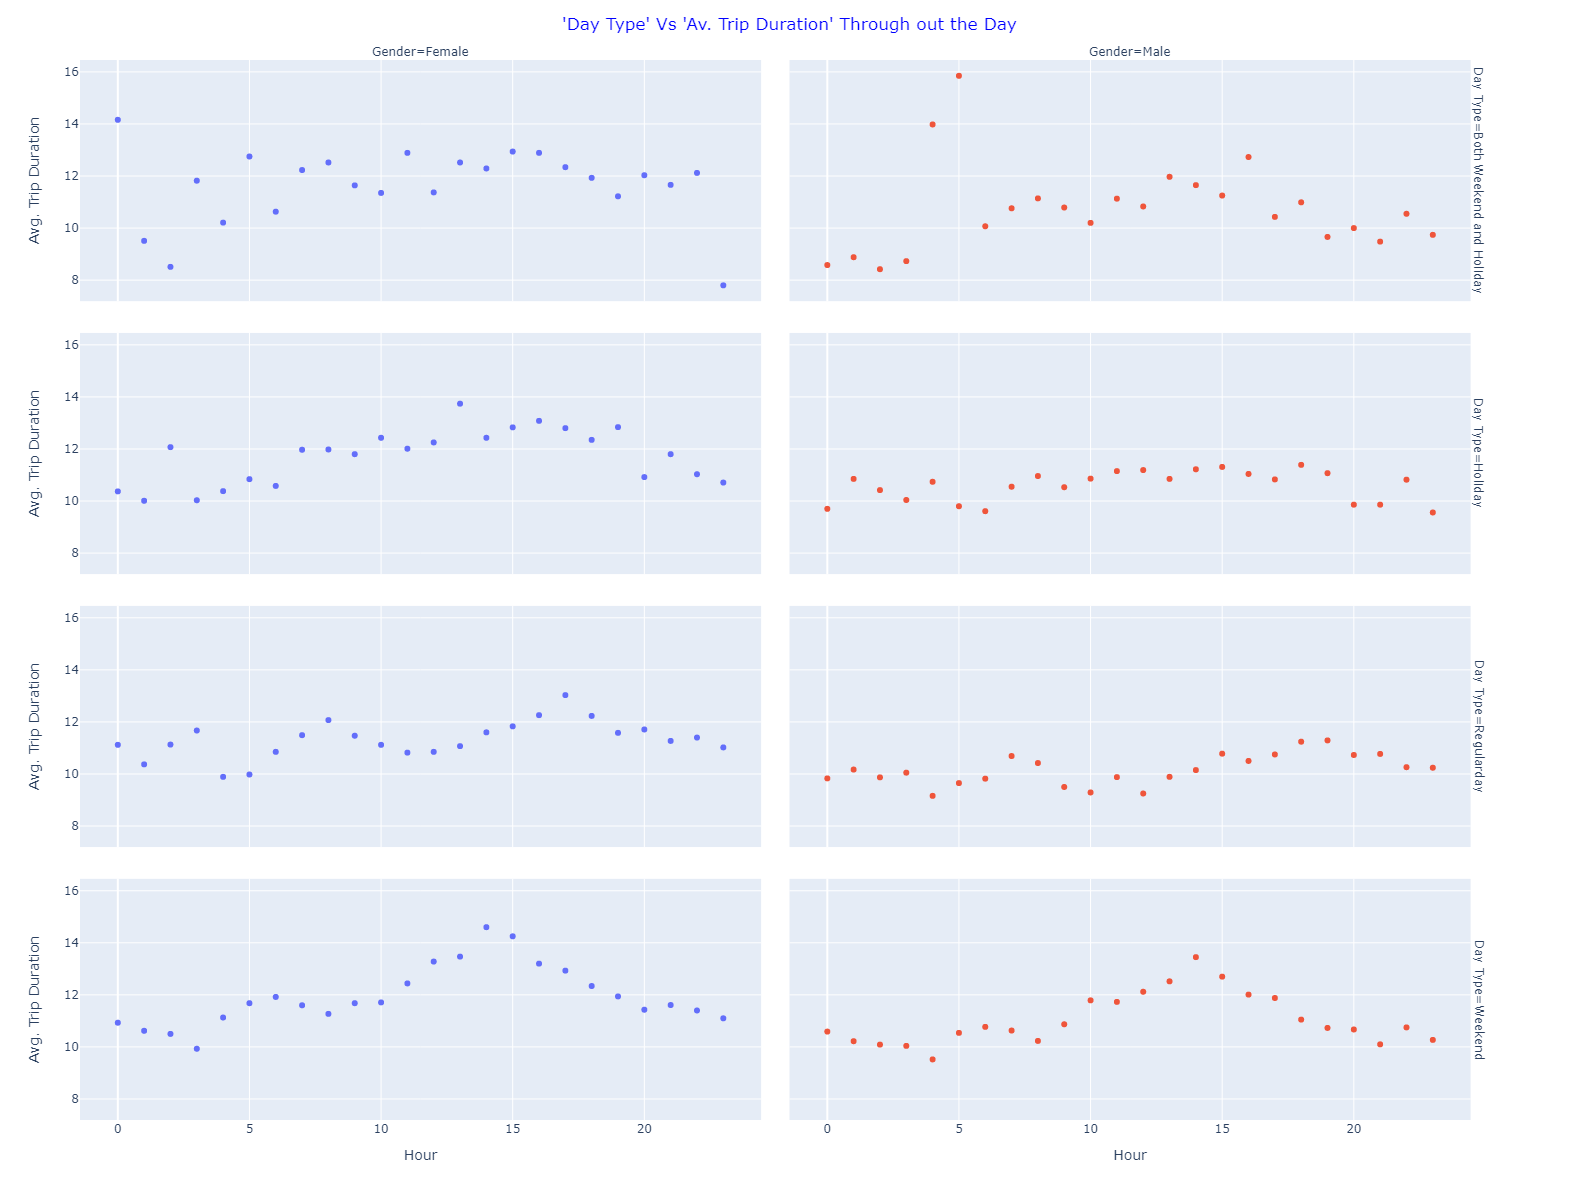

In [527]:
fig = px.scatter(df2, x = 'Hour', y = 'Avg. Trip Duration', color = 'Gender', facet_col = 'Gender', facet_row = 'Day Type', width = 800, height = 1200)
fig.update_layout(title = {"text": "'Day Type' Vs 'Av. Trip Duration' Through out the Day", "x": 0.5,}, title_font_color = 'blue', showlegend = False,) #plot_bgcolor = 'black',
fig.update_xaxes(tickmode = 'auto', showgrid = True) #tickmode = 'linear'
fig.update_yaxes(showgrid = True)
fig.show()

# 8 - Facetting (Season Type: Summer, Winter, Fall, Spring)

In [528]:
df2 = df1.groupby(['Hour', 'Gender', 'Season Type']).aggregate({'Avg. Trip Duration': 'mean',
                                                                'Trip Count': 'mean',
                                                                }).reset_index()

In [529]:
# Changing Columns Names and Rounding off some columns

In [530]:
df2.columns

Index(['Hour', 'Gender', 'Season Type', 'Avg. Trip Duration', 'Trip Count'], dtype='object')

In [531]:
df2.columns = ['Hour', 'Gender', 'Season Type', 'Avg. Trip Duration', 'Avg. Trip Count']

In [532]:
df2['Avg. Trip Duration'] = df2['Avg. Trip Duration'].apply(lambda x: round(x, 2))
df2['Avg. Trip Count'] = df2['Avg. Trip Count'].apply(lambda x: round(x, 2))

In [533]:
#df2

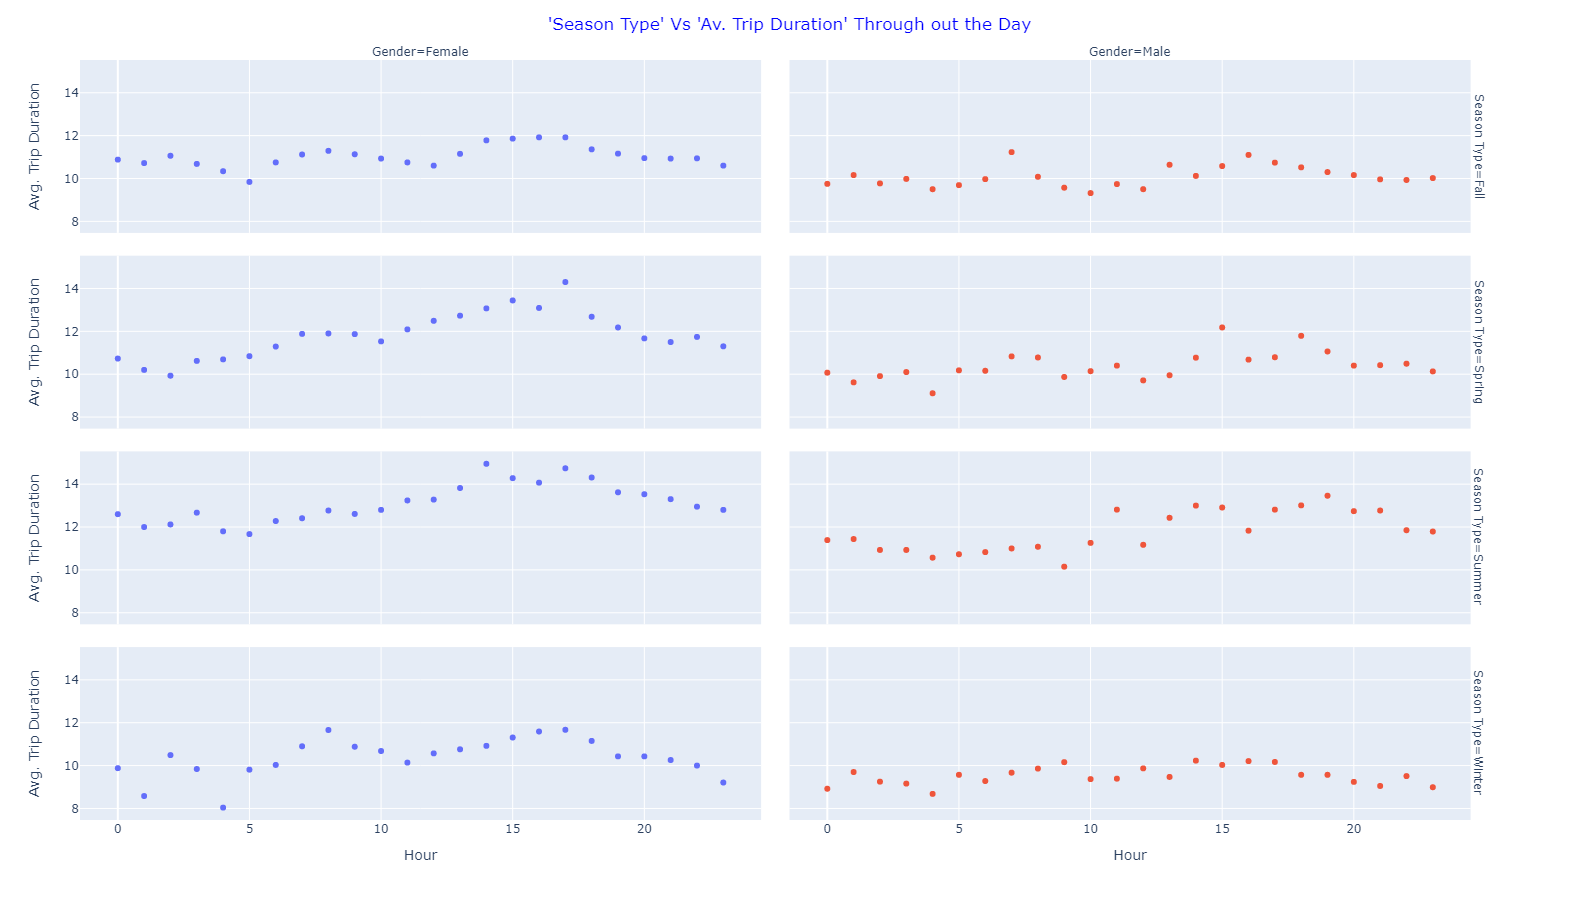

In [534]:
fig = px.scatter(df2, x = 'Hour', y = 'Avg. Trip Duration', color = 'Gender', facet_col = 'Gender', facet_row = 'Season Type', width = 700, height = 900)
fig.update_layout(title = {"text": "'Season Type' Vs 'Av. Trip Duration' Through out the Day", "x": 0.5,}, title_font_color = 'blue', showlegend = False,) #plot_bgcolor = 'black',
fig.update_xaxes(tickmode = 'auto', showgrid = True) #tickmode = 'linear'
fig.update_yaxes(showgrid = True)
fig.show()

# 9 - Facetting (Weather Type on Each Day of Week)

In [535]:
df2 = df1.groupby(['Day of Week', 'Gender', 'Weather Type']).aggregate({'Avg. Trip Duration': 'mean',
                                                                        'Trip Count': 'mean',
                                                                        }).reset_index()

In [536]:
# Changing Columns Names and Rounding off some columns

In [537]:
df2.columns

Index(['Day of Week', 'Gender', 'Weather Type', 'Avg. Trip Duration',
       'Trip Count'],
      dtype='object')

In [538]:
df2.columns = ['Day of Week', 'Gender', 'Weather Type', 'Avg. Trip Duration','Avg. Trip Count']

In [539]:
df2.columns

Index(['Day of Week', 'Gender', 'Weather Type', 'Avg. Trip Duration',
       'Avg. Trip Count'],
      dtype='object')

In [540]:
df2['Avg. Trip Duration'] = df2['Avg. Trip Duration'].apply(lambda x: round(x, 2))
df2['Avg. Trip Count'] = df2['Avg. Trip Count'].apply(lambda x: round(x, 2))

In [541]:
#df2

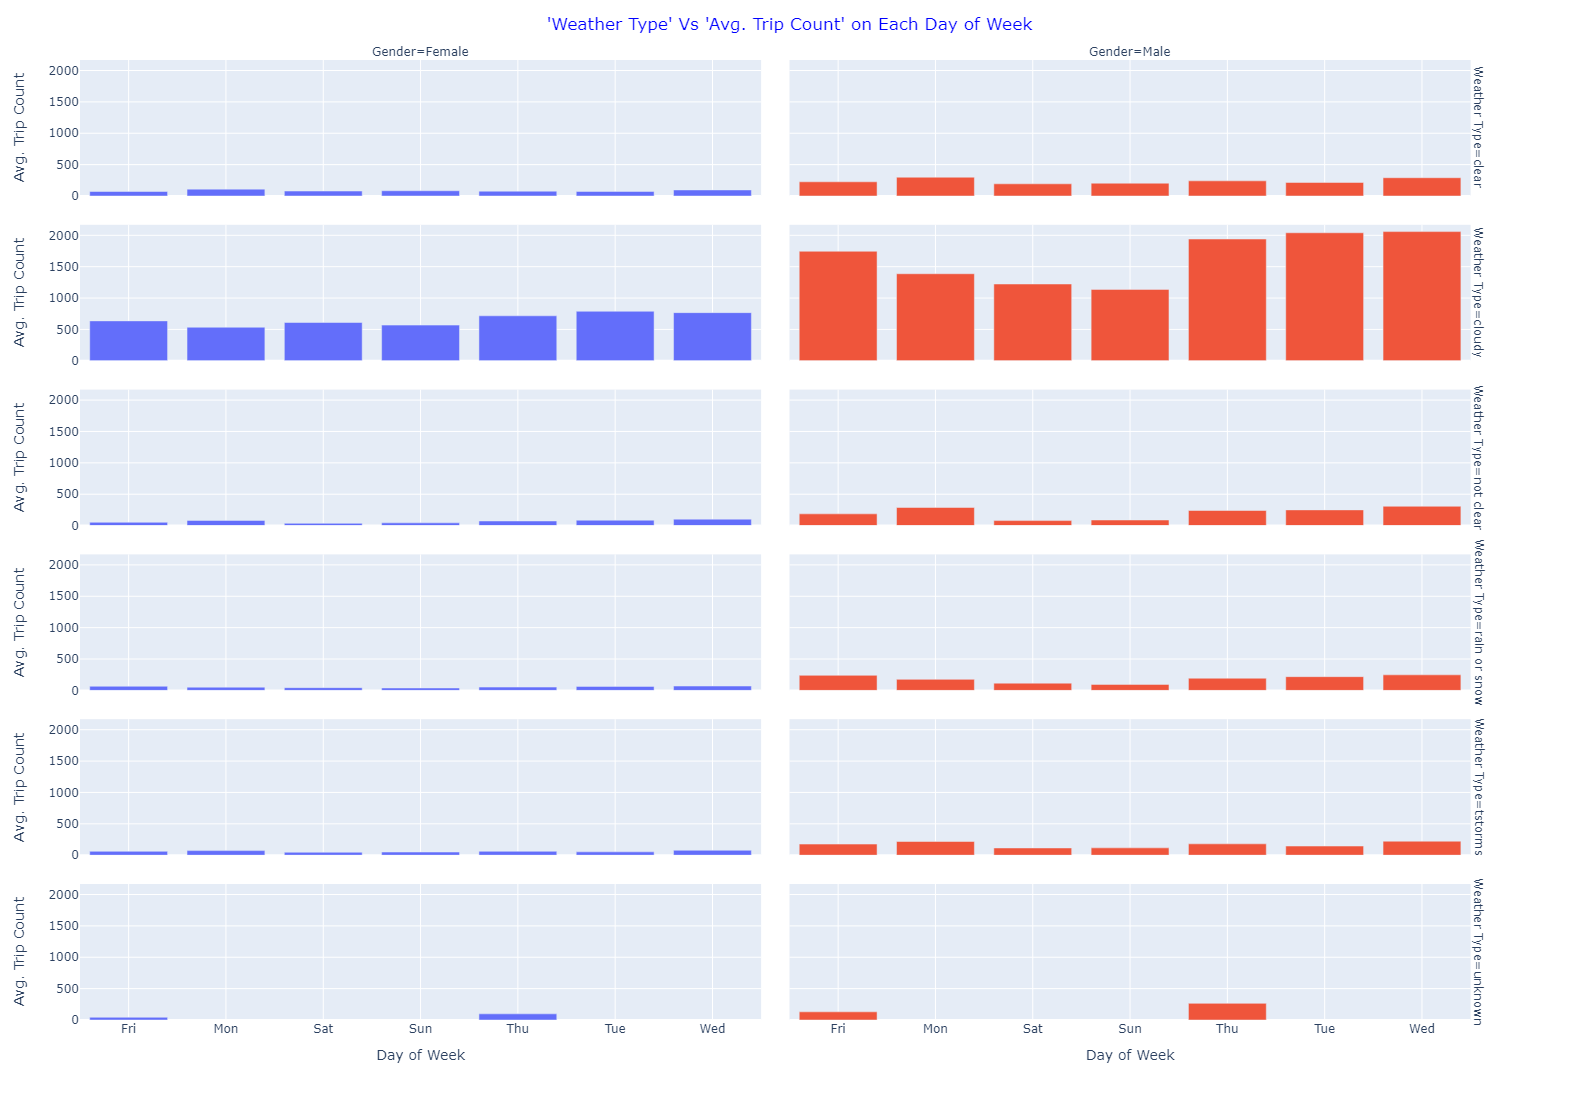

In [542]:
fig = px.bar(df2, x = 'Day of Week', y = 'Avg. Trip Count', color = 'Gender', facet_col = 'Gender', facet_row = 'Weather Type', width = 700, height = 1100)
fig.update_layout(title = {"text": "'Weather Type' Vs 'Avg. Trip Count' on Each Day of Week", "x": 0.5,}, title_font_color = 'blue', showlegend = False,) #plot_bgcolor = 'black',
fig.update_xaxes(tickmode = 'auto', showgrid = True) #tickmode = 'linear'
fig.update_yaxes(showgrid = True)
fig.show()

# To be Continued .................